In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\Arun\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3551, 19)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,kiran residency,sector 56,1.54,8324.0,3.0,4.0,3+,5.0,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,616.666667
1,house,independent,sohna road,0.07,2527.0,1.0,1.0,0,1.0,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.000000
2,flat,the close north,sector 50,2.70,10365.0,3.0,3.0,3+,6.0,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,868.333333
3,flat,dlf new town heights,sector 90,1.25,6477.0,3.0,3.0,3+,6.0,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0,643.333333
4,flat,ss,sector 85,1.19,7121.0,2.0,2.0,3,11.0,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,835.500000


In [5]:
latlong = pd.read_csv('latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3281 non-null   object 
 1   society          3280 non-null   object 
 2   sector           3281 non-null   object 
 3   price            3281 non-null   float64
 4   price_per_sqft   3281 non-null   float64
 5   bedRoom          3281 non-null   float64
 6   bathroom         3281 non-null   float64
 7   balcony          3281 non-null   object 
 8   floorNum         3281 non-null   float64
 9   agePossession    3281 non-null   object 
 10  built_up_area    3281 non-null   float64
 11  study room       3281 non-null   float64
 12  servant room     3281 non-null   float64
 13  store room       3281 non-null   float64
 14  pooja room       3281 non-null   float64
 15  others           3281 non-null   float64
 16  furnishing_type  3281 non-null   float64
 17  luxury_score  

In [36]:
group_df = new_df.pivot_table(index='sector', 
                              values=['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude'], 
                              aggfunc='mean')


<ipython-input-36-cd5faa40d15a>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [37]:
group_df

,built_up_area,latitude,longitude,price,price_per_sqft
sector,,,,,
gwal pahari,3056.166667,28.4484,77.0210,3.192222,9585.777778
manesar,2061.846667,28.3515,76.9428,0.978333,4633.666667
sector 1,2327.833333,28.3663,76.9456,1.860000,8249.833333
sector 102,1558.405660,28.4750,76.9715,1.698113,10615.811321
sector 103,1865.428571,28.4949,76.9845,1.495000,7445.785714
...,...,...,...,...,...
sector 92,1584.271800,28.4079,76.9153,0.950000,5962.100000
sector 93,1017.000000,28.4153,76.9326,0.848889,8009.888889
sector 95,5806.033333,28.4172,76.9081,0.466167,5140.466667


In [38]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [39]:
new_df.to_csv('data_viz1.csv',index=False)

In [8]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [9]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 56 Gurgaon,flat,kiran residency,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,4,3+,Servant Room,"Sector 56, Sector 56 Gurgaon, Gurgaon, Haryana",5.0,South,10+ Year Old,"['Sector metro station', 'Sector metro station...","Situated in sector 56 gurgaon, kiran residency...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
1,1 Bedroom House for sale in Sohna,house,independent,0.07,2525.0,277.0,Plot area 33(27.59 sq.m.),1,1,0,not available,"Sohna, Gurgaon, Haryana",1.0,NaN,1 to 5 Year Old,NaN,Interested to sell independent house/villa.Pla...,[],NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,4 BHK Flat in Sector 65 Gurgaon,flat,m3m golfestate,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,Servant Room,"Sector 65 Gurgaon, Gurgaon, Haryana",13.0,North,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall...",4 bedroom 11000 sq.Ft. Middle floor penthouse ...,"['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Power Back-up', 'Intercom Facility', 'Lift(s...","['Green Area5 out of 5', 'Construction5 out of..."
3,3 BHK Flat in Nirvana Country,flat,the close north,2.70,10364.0,2605.0,Super Built up area 2605(242.01 sq.m.)Built Up...,3,3,3+,Servant Room,"002, Nirvana Country, Gurgaon, Haryana",6.0,East,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Eros City Squa...",Check out this 3 bhk apartment for sale in the...,"['5 Fan', '15 Light', 'No AC', 'No Bed', 'No C...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction4 out of..."
4,3 BHK Flat in Sector 90 Gurgaon,flat,dlf new town heights,1.25,6476.0,1930.0,Super Built up area 1930(179.3 sq.m.)Built Up ...,3,3,3+,"Pooja Room,Servant Room","55665, Sector 90 Gurgaon, Gurgaon, Haryana",6.0,West,1 to 5 Year Old,"['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RH...",This beautiful 3 bhk flat in sector 90 gurgaon...,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction4 out of..."


In [12]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [13]:
wordcloud_df.head()

,features,sector
0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",sector 56
1,NaN,sohna road
2,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 50
3,"['Centrally Air Conditioned', 'Water purifier'...",sector 90
4,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 85


In [52]:
import ast
main = []
def choose_sec(sector):    

    for item in wordcloud_df.query("sector ==sector")['features'].dropna().apply(ast.literal_eval):
        main.extend(item)
        
    return main

In [22]:
from wordcloud import WordCloud

In [23]:
feature_text = ' '.join(main)

In [54]:
import pickle
with open('wordcloud_df.pkl', 'wb') as file:
    pickle.dump(wordcloud_df, file)

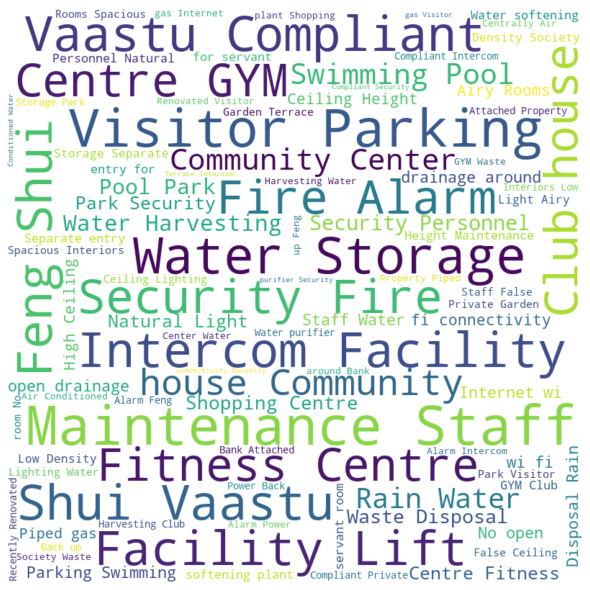

In [26]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [27]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [28]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [29]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [30]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


<ipython-input-31-dc32b660127e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-31-dc32b660127e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

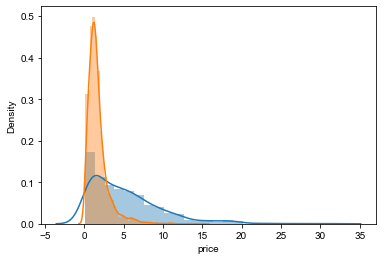

In [31]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [32]:
new_df['sector'].unique().tolist().insert(0,'overall')